In [ ]:
import pandas as pd
import numpy as np
from scipy import stats


file_path = r"C:\Users\HP\Downloads\Final keerthi ameya.xlsx"
df = pd.read_excel(file_path, sheet_name="Sheet1")

# Handling missing values
df.fillna(df.median(numeric_only=True), inplace=True)  
df.fillna(df.mode().iloc[0], inplace=True)  


numeric_cols = ["Age", "W1", "W2", "sgpt  1", "sgpt 2", "Stage"]
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")



descriptive_stats = {
    col: df[col].describe() for col in numeric_cols
}

# Frequency Distributions
frequency_distributions = {
    "Gender": df["Gender"].value_counts(),
    "Stage": df["Stage"].value_counts(),
    "Tumor Location": df["Location"].value_counts(),
    "Treatment Types": {
        "Surgery": df["surgery"].value_counts(),
        "Chemotherapy": df["chemotherapy"].value_counts(),
        "Radiation": df["radiation"].value_counts(),
    },
    "Blood Group": df["Blood group"].value_counts(),
}

# Paired T-tests: W1 vs W2 (Weight) & SGPT 1 vs SGPT 2
t_w, p_w, t_sgpt, p_sgpt = None, None, None, None

if df[["W1", "W2"]].dropna().shape[0] > 1:
    t_w, p_w = stats.ttest_rel(df["W1"], df["W2"], nan_policy='omit')

if df[["sgpt  1", "sgpt 2"]].dropna().shape[0] > 1:
    t_sgpt, p_sgpt = stats.ttest_rel(df["sgpt  1"], df["sgpt 2"], nan_policy='omit')

# Print results
print("Descriptive Statistics:")
for key, value in descriptive_stats.items():
    print(f"\n{key}:\n{value}")

print("\nFrequency Distributions:")
for key, value in frequency_distributions.items():
    print(f"\n{key}:\n{value}")

print("\nPaired t-tests:")
if t_w is not None:
    print(f"Weight (W1 vs W2): t={t_w:.4f}, p={p_w:.4e}")
else:
    print("Weight test could not be performed due to insufficient data.")

if t_sgpt is not None:
    print(f"SGPT Levels (SGPT 1 vs SGPT 2): t={t_sgpt:.4f}, p={p_sgpt:.4e}")
else:
    print("SGPT test could not be performed due to insufficient data.")


Descriptive Statistics:

Age:
count    276.000000
mean      48.978261
std       11.070004
min       26.000000
25%       42.000000
50%       47.000000
75%       55.000000
max       88.000000
Name: Age, dtype: float64

W1:
count    276.000000
mean      53.366522
std       12.923202
min       26.500000
25%       43.400000
50%       52.000000
75%       61.800000
max      103.000000
Name: W1, dtype: float64

W2:
count    276.000000
mean      49.560362
std       11.750998
min       24.000000
25%       40.950000
50%       48.600000
75%       56.000000
max      101.000000
Name: W2, dtype: float64

sgpt  1:
count    276.000000
mean      26.573804
std       26.999007
min        0.870000
25%       16.575000
50%       19.990000
75%       24.337500
max      247.590000
Name: sgpt  1, dtype: float64

sgpt 2:
count    276.000000
mean      21.631920
std        8.961154
min        7.500000
25%       20.470000
50%       20.470000
75%       20.470000
max      109.700000
Name: sgpt 2, dtype: float64

Stage

In [26]:
print(df.columns.tolist())


['ID', 'Age', 'Gender', 'W1', 'W2', 'w1-w2', 'Date and time of admission', 'Stage', 'Size (cm/mm)', 'Location', 'pet scan', 'surgery', 'chemotherapy', 'radiation', 'sgpt  1', 'sgpt 2', 'HCV test', 'HIV test', 'Blood group', 'Deceased']


In [27]:
print(df.columns)


Index(['ID', 'Age', 'Gender', 'W1', 'W2', 'w1-w2',
       'Date and time of admission', 'Stage', 'Size (cm/mm)', 'Location',
       'pet scan', 'surgery', 'chemotherapy', 'radiation', 'sgpt  1', 'sgpt 2',
       'HCV test', 'HIV test', 'Blood group', 'Deceased'],
      dtype='object')


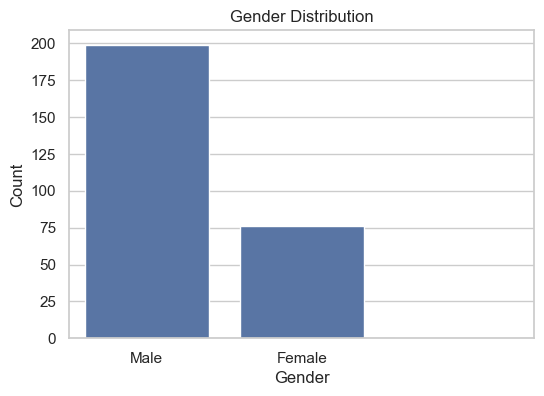

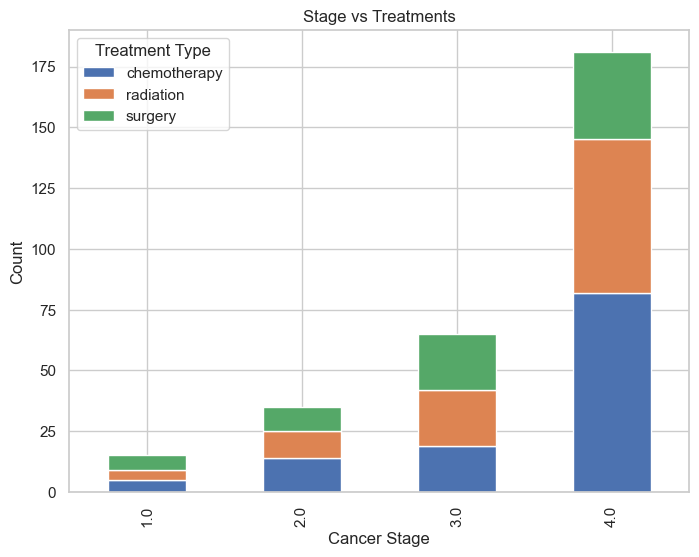

<Figure size 600x400 with 0 Axes>

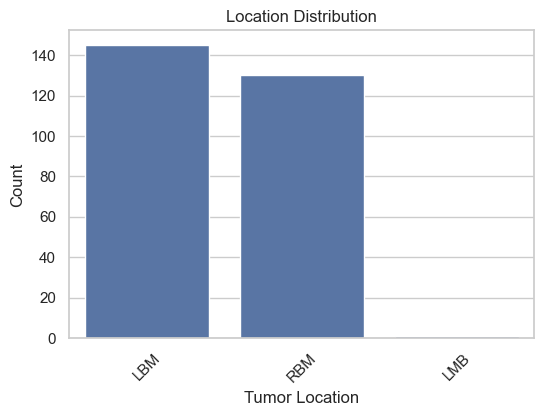

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# df = pd.read_excel

sns.set(style="whitegrid")

#Gender Distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=df['Gender'].value_counts().index, y=df['Gender'].value_counts().values)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender Distribution")
plt.xticks(ticks=[0, 1], labels=["Male", "Female"])
plt.show()


#Stage and Treatment
treatment_counts = df.groupby("Stage")[["chemotherapy", "radiation", "surgery"]].sum()
treatment_counts.plot(kind="bar", stacked=True, figsize=(8, 6))
plt.xlabel("Cancer Stage")
plt.ylabel("Count")
plt.title("Stage vs Treatments")
plt.legend(title="Treatment Type")
plt.show()

#Size stage
plt.figure(figsize=(6, 4))


# 4.Location Distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=df["Location"].value_counts().index, y=df["Location"].value_counts().values)
plt.xlabel("Tumor Location")
plt.ylabel("Count")
plt.title("Location Distribution")
plt.xticks(rotation=45)
plt.show()





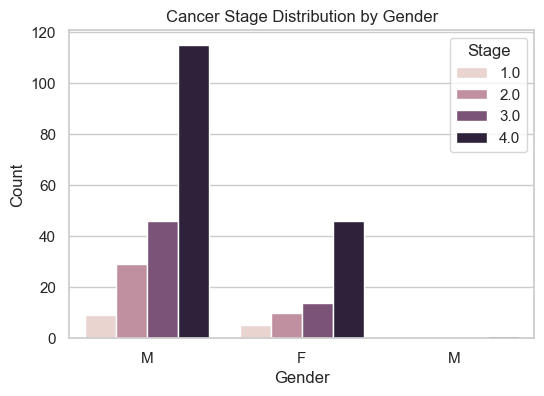

In [29]:
plt.figure(figsize=(6, 4))
sns.countplot(x="Gender", hue="Stage", data=df)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Cancer Stage Distribution by Gender")
plt.legend(title="Stage")
plt.show()


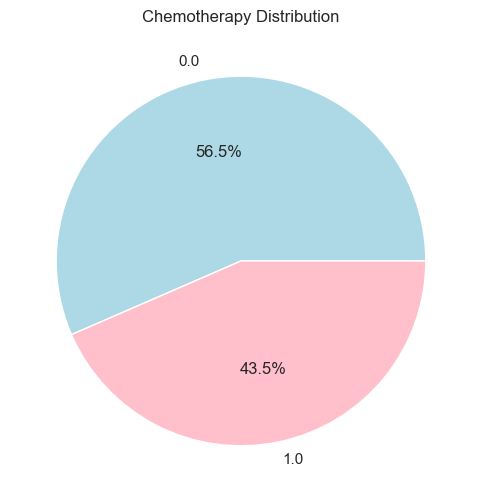

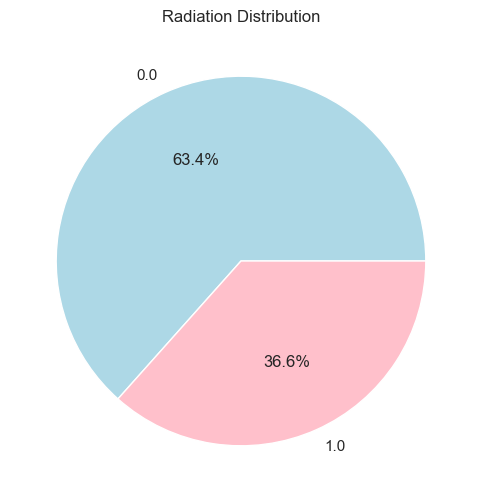

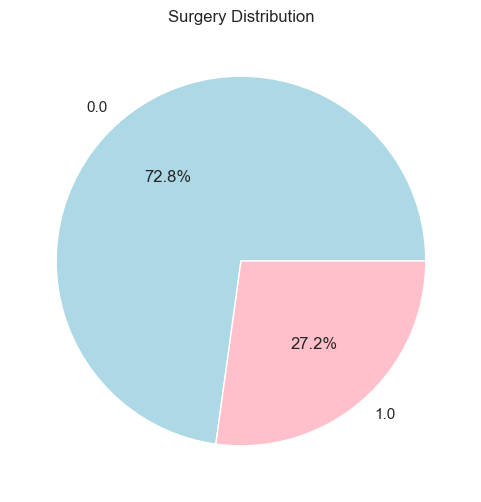

In [30]:
treatment_cols = ['chemotherapy', 'radiation', 'surgery']

for col in treatment_cols:
    plt.figure(figsize=(6, 6))
    df[col].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'pink'])
    plt.title(f"{col.capitalize()} Distribution")
    plt.ylabel("")
    plt.show()


In [31]:
print(df.columns)


Index(['ID', 'Age', 'Gender', 'W1', 'W2', 'w1-w2',
       'Date and time of admission', 'Stage', 'Size (cm/mm)', 'Location',
       'pet scan', 'surgery', 'chemotherapy', 'radiation', 'sgpt  1', 'sgpt 2',
       'HCV test', 'HIV test', 'Blood group', 'Deceased'],
      dtype='object')


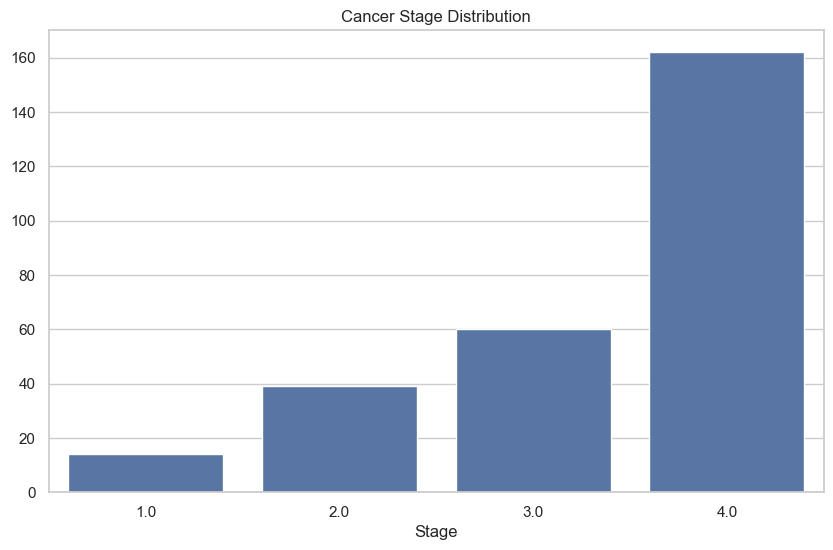

In [32]:
#Cancer Stage Distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=df['Stage'].value_counts().index, y=df['Stage'].value_counts().values)
plt.title('Cancer Stage Distribution')
plt.show()


In [33]:
# Clean column names
df.columns = df.columns.str.strip()

# Check if required columns exist
required_columns = {"Stage", "size cm^3"}
if not required_columns.issubset(df.columns):
    print(f"Error: Missing required columns {required_columns - set(df.columns)} in the dataset.")
else:
    # Fill missing values
    df.fillna(df.median(numeric_only=True), inplace=True)  # Numeric columns
    for col in df.select_dtypes(include=["object"]).columns:  # Categorical columns
        df[col].fillna(df[col].mode()[0], inplace=True)


    stage_size_avg = df.groupby("Stage")["size cm^3"].mean().reset_index()

 
    fig, ax1 = plt.subplots(figsize=(8, 5))

    # Bar chart (left y-axis)
    sns.barplot(x="Stage", y="size cm^3", data=stage_size_avg, ax=ax1, color="skyblue", label="Avg Size")
    ax1.set_xlabel("Stage")
    ax1.set_ylabel("Average Size", color="black")
    ax1.tick_params(axis="y", labelcolor="black")

    # Line chart (right y-axis)
    ax2 = ax1.twinx()
    sns.lineplot(x="Stage", y="size cm^3", data=stage_size_avg, ax=ax2, marker="o", color="black", label="Trend Line")
    ax2.set_ylabel("Size Trend", color="black")
    ax2.tick_params(axis="y", labelcolor="black")

    # Title and legend
    plt.title("Combination Chart: Stage vs Size")
    fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
    plt.show()

Error: Missing required columns {'size cm^3'} in the dataset.
